# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [2]:
# Грузим библиотеки и загружаем данные из датасета
import pandas as pd
from scipy import stats as st # Cтатистика
import seaborn as sns
import matplotlib.pyplot as plt
# Будем смотреть графики, поэтому сразу же увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

#import numpy as np
vgames = pd.read_csv("https://raw.githubusercontent.com/ant69/pandas_statistic/main/vgsales.csv")    
vgames.head()
#vgames.shape

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Как критики относятся к спортивным играм?
# Прошу прощения, но этот вопрос кажется максимально абстрактным. 
# Не понимаю, какие тут можно выдвигать гипотезы, здесь можно просто посчитать какие-то характеристики оценок
# Вначале выделим соответствующую серию из датафрейма и уберем NaN
sport_games_score = vgames[(vgames.Genre == 'Sports')]['Critic_Score'].dropna()
# смотрим на характеристики серии
print(sport_games_score.describe())
sport_games_score.head(20)


count    1194.000000
mean       71.968174
std        13.878433
min        19.000000
25%        64.000000
50%        75.000000
75%        82.000000
max        98.000000
Name: Critic_Score, dtype: float64


0      76.0
3      80.0
13     80.0
15     80.0
77     82.0
94     85.0
126    86.0
141    73.0
143    82.0
183    94.0
202    89.0
205    92.0
213    88.0
227    98.0
238    91.0
241    84.0
249    97.0
250    86.0
271    84.0
274    80.0
Name: Critic_Score, dtype: float64

(array([  7.,  11.,  31.,  53.,  91., 153., 231., 345., 232.,  40.]),
 array([19. , 26.9, 34.8, 42.7, 50.6, 58.5, 66.4, 74.3, 82.2, 90.1, 98. ]),
 <BarContainer object of 10 artists>)

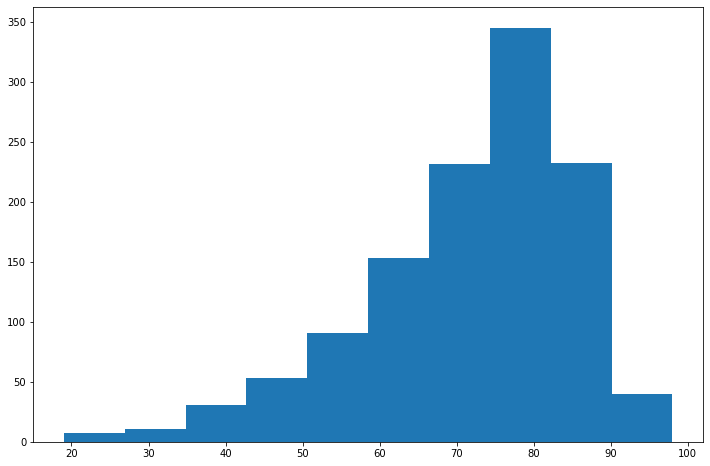

In [5]:
# Смотрим, как выглядит распределение оценок
plt.hist(sport_games_score)
# Похоже на нормальное распределение с "левым хвостом"

Year_of_Release
1980.0      0
1981.0      0
1982.0      0
1983.0      0
1984.0      0
1985.0      0
1986.0      0
1987.0      0
1988.0      0
1989.0      0
1990.0      0
1991.0      0
1992.0      0
1993.0      0
1994.0      0
1995.0      0
1996.0      0
1997.0      0
1998.0      1
1999.0      3
2000.0     32
2001.0     70
2002.0    150
2003.0     93
2004.0     82
2005.0     87
2006.0     98
2007.0    107
2008.0    100
2009.0     78
2010.0     75
2011.0     46
2012.0     31
2013.0     28
2014.0     32
2015.0     26
2016.0     26
Name: Critic_Score, dtype: int64


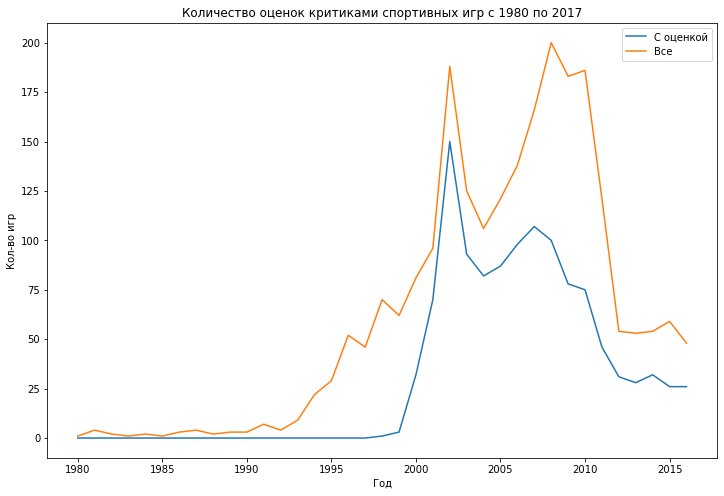

In [6]:
# Размышляя над тем, какие гипотезы можно сформулировать, в поисках идей обнаружил на сайте kaggle разбор этого датасета,
# и в частности анализ того, в какие периоды критики давали оценки видеоиграм.
# (см. здесь: https://www.kaggle.com/coffeepot/videogame-sales/notebook#Videogame-Sales-with-Rating)
# Передрав оттуда фрагмент кода и слегка его поправив, получил для спортивных игр следующее любопытное распределение
# На графике две линии. Одна показывает количество выходящих ежегодно игр, а вторая - те из них, которые оценивали критики
cs_counts = vgames[(vgames.Genre == 'Sports')].Critic_Score.groupby(vgames.Year_of_Release).count()
print(cs_counts)
sports_counts = vgames[(vgames.Genre == 'Sports')].Publisher.groupby(vgames.Year_of_Release).count()
plt.plot(cs_counts)
plt.plot(sports_counts)
plt.title("Количество оценок критиками спортивных игр с 1980 по 2017")
plt.xlabel("Год")
plt.ylabel("Кол-во игр")
plt.legend(["С оценкой","Все"])
# Анализируя получившийся график, можно сделать выводы о том, что примерно до 2000 года критики вообще молчали
# (или, что более вероятно) их оценки не протоколировались, а также видно, что примерно с 2007 по 2012 г. 
# шло ежегодное резкое падение количества оцениваемых игр, а с 2012 года оно более-менее стабилизировалось

In [7]:
# Исходя из увиденного можно выдвинуть следующую гипотезу, которую и можно попробовать проверить.
# Разобьем весь объем данных по оценкам на то, что было до 2012 года и на то, что было после 2012 года
# Нулевая гипотеза заключается в том, что оценка экспертами игр до 2012 года  мало отличается от оценок после 2012 года
# Альтернативная гипотеза - что вместе с изменением количества оценок изменилось и их качество.
# Для начала просто сформируем две выборки и посмотрим их статистические характеристики
vgames['Year_2012'] = vgames.Year_of_Release.map(lambda x: 'before' if x < 2012.0 else 'after')
sport_games = vgames[(vgames.Genre == 'Sports')]
sport_games_scores = sport_games.loc[:, ('Critic_Score', 'Year_2012')].dropna()
sport_games_scores.groupby('Year_2012').describe()
# Увидев полученные цифры, дальше эту гипотезу статистически даже проверять не хочется, есть ощущение,
# что нулевую гипотезу не опровергнуть...

Critic_Score                                                    
                 count       mean        std   min   25%   50%   75%   max
Year_2012                                                                 
after            172.0  72.569767  14.973693  19.0  68.0  77.0  83.0  94.0
before          1022.0  71.866928  13.690718  19.0  64.0  75.0  82.0  98.0

In [8]:
sport_games_scores.head()
sg_before_2012 = sport_games_scores[(sport_games_scores.Year_2012 == 'before')]['Critic_Score']
sg_after_2012 = sport_games_scores[(sport_games_scores.Year_2012 == 'after')]['Critic_Score']
#sg_before_2012
t, p_value = st.ttest_ind(sg_before_2012, sg_after_2012) #Критерий Стьюдента (t-test)
t, p_value
# Ну да, гипотеза оказалась дурацкой и успешно не подтвердилась.
# p_value на порядок превышает значение 0.05, которое является пороговым для уровня доверия 95%
# В этой связи фиксируем,что несмотря на значительное уменьшение количества спортивных видеоигр начиная с 2012 года
# уровень оценок критиков спортивных игр практически не изменился.
# Есть и другие внешние разборы этих данных. К примеру: https://rpubs.com/vh42720/vgsales
# Теоретически можно было бы еще как-то нормировать оценки по количеству экспертов, их давших

(-0.6143135708512636, 0.5391253661950035)

Платформа PC
        Critic_Score
count    715.000000
mean      75.928671
std       11.170775
min       33.000000
25%       70.000000
50%       78.000000
75%       84.000000
max       96.000000

Платформа PS4
        Critic_Score
count    252.000000
mean      72.091270
std       12.485992
min       19.000000
25%       66.000000
50%       73.000000
75%       80.000000
max       97.000000


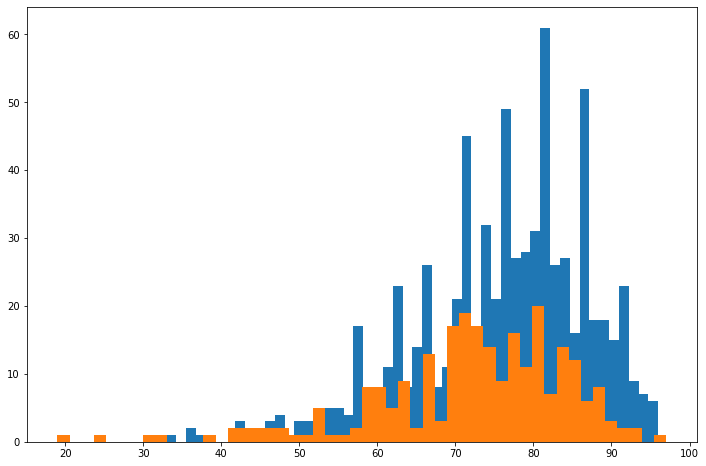

In [24]:
# Критикам нравятся больше игры на PC или на PS4?

# Здесь задача сформулирована более понятно, поэтому будем двигаться вперед более уверенно :)
# Вначале получим две серии с оценками критиков для игр на PS и на PS4, посмотрим их распределения и основные характеристики,
# а потом подумаем о гипотезах.
pc_scores = vgames[(vgames.Platform=='PC')][['Critic_Score']].dropna()
ps4_scores = vgames[(vgames.Platform=='PS4')][['Critic_Score']].dropna()
#print(pc_scores.head())
print('Платформа PC\n', pc_scores.describe())
#print(ps4_scores.head())
print('\nПлатформа PS4\n', ps4_scores.describe())
# Посмотрим на гистограмме распределения
plt.hist(pc_scores, bins=50); 
plt.hist(ps4_scores, bins=50);
# В принципе на основе этих данных уже можно строить гипотезу о том, что оценки экспертов для PC выше, чем для PS4
# При этом есть ощущение, что данных не очень много (715 оцененных игр на платформе PC и 252 на платформе PS4)

In [25]:
# Тем не менее попробуем пощупать эти данные с помощью любимого t-теста
# Наша нулевая гипотеза заключается в том, что эксперты ставят примерно одинаковые оценки играм на обеих платформах
# Альтернативная гипотеза - оценки различаются. На берегу решим, что уровень значимости у нас будет жестким. Скажем, 1%
t, p_value = st.ttest_ind(pc_scores, ps4_scores) #Критерий Стьюдента (t-test)
t, p_value
# значение p-value= 0,0000062 полученное в результате проверки, заставляет нас с негодованием отвергнуть нулевую гипотезу
# Собственно говоря, все и так было видно по диаграмме и по средним значениям. Тем не менее нельзя не отметить, 
# что гистограммы перекрываются в значительной степени, и даже несмотря на такие значения при случайном выборе
# одной игры для PC и одной для PS4 мы довольно часто будем получать более высокую оценку для PS4.
# Такое незначительное смещение уровня оценок может быть связать только с тем, что у PC пиар лучше.

(array([4.54411246]), array([6.21579783e-06]))

In [26]:
# Критикам больше нравятся стрелялки или стратегии?
# Для начала попробуем найти в списке жанров игр, кто у нас - стрелялки, а кто - стратегии:
print(vgames.Genre.unique())
# Отлично. Стрелялки - это Shooter, Стратегии - Strategy. Теперь можно сформировать серии. 
# Используем тот же алгоритм, который использовали для предыдущей задачи

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


Стрелялки
        Critic_Score
count    944.000000
mean      70.181144
std       14.552571
min       22.000000
25%       61.000000
50%       73.000000
75%       81.000000
max       97.000000

Стратегии
        Critic_Score
count    302.000000
mean      72.086093
std       11.828475
min       35.000000
25%       65.000000
50%       73.000000
75%       80.000000
max       94.000000


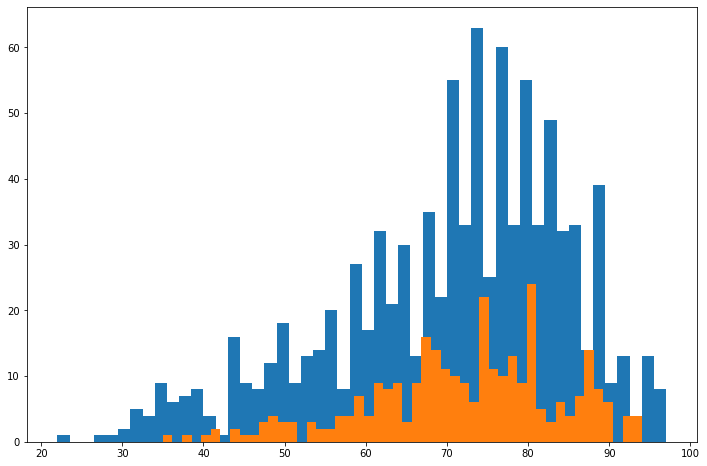

In [27]:
shooters_scores = vgames[(vgames.Genre=='Shooter')][['Critic_Score']].dropna()
strategies_scores = vgames[(vgames.Genre=='Strategy')][['Critic_Score']].dropna()
#print(shooters_scores.head())
print('Стрелялки\n', shooters_scores.describe())
#print(strategies_scores.head())
print('\nСтратегии\n', strategies_scores.describe())
# Посмотрим на гистограмме распределения
plt.hist(shooters_scores, bins=50); 
plt.hist(strategies_scores, bins=50);
# Пока, до использования всяких умных критериев, кажется, что несмотря на количество оценок, общий их характер очень похож.
# Фактически совпадают медианы, средние значения отличаются незначительно, а минимумы и максимумы стрелялок перекрывают 
# аналогичные показатели стратегий, т.е. колокол стрелялок шире в обе стороны.

In [28]:
# Нулевая гипотеза заключается в том, что эксперты ставят примерно одинаковые оценки стрелялкам и стратегиям
# Альтернативная гипотеза - все-таки значимые различия есть. Примем более мягкий уровень значимости. Скажем, 5%
t, p_value = st.ttest_ind(shooters_scores, strategies_scores) #Критерий Стьюдента (t-test)
t, p_value
# Хотя формально p-value=0.038 и меньше 0.05, мне не кажется убедительным величина t, дисперсия у обоих выборок высоковата

(array([-2.06670264]), array([0.03896871]))

In [31]:
# Интереса ради посмотрим, что покажет критерий Манна-Уитни
st.mannwhitneyu(shooters_scores, strategies_scores)
# Эта проверка явно намекает на то, что альтернативной гипотезе тут места нет, оценки критиков для игр этих жанров очень похожи.

MannwhitneyuResult(statistic=136251.5, pvalue=0.12376981047345825)

## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Приведите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Приведите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  

6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);  

7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  

8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);  

9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [16]:
#Предварительно файл с данными был скопирован в мой GitHub
txt_messages = pd.read_csv('https://raw.githubusercontent.com/ant69/pandas_statistic/main/spam.csv', sep=',')
txt_messages.head()
# Данные получены, начинаем шаманить

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
# 1) Приведите весь текст к нижнему регистру;
# 2) Удалите мусорные символы;
# 3) Удалите стоп-слова;
# 4) Приведите все слова к нормальной форме;
# 5) Преобразуйте все сообщения в вектора TF-IDF (ссылка для себя: https://ru.wikipedia.org/wiki/TF-IDF)
# Поскольку первые четыре пункта задания предполагают выполнение операций над каждым сообщением,
# есть большой соблазн объединить все эти действия в одну функцию, которую можно "смаппить"
# Сразу же загрузим нужные для всего этого библиотеки
# Понадобится регулярка - импортируем библиотеку re
import re

# Получаем массив стоп-слов для английского языка для его использования в функции вычисления вектора из исходного текста
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_eng = set(stopwords.words('english'))

# Подготавливаем лемматайзер для приведения всех слов к нормальной форме (долой падежи и прочие вариации)
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

# Функция для "чистки" исходных сообщений и приведения их к единообразию
# По мере написания этой функции осуществлялась проверка адекватности каждого из преобразований
def create_vector(msg):
    # К нижнему регистру
    msg_lower = msg.lower()
    # Убираем лишние символы
    msg_without_junk = re.sub('[\W_]+', ' ', msg_lower)
    # Создаем список слов из текущего сообщения
    msg_words = msg_without_junk.split()
    # Удаляем стоп-слова
    words_don_t_stop_me_now = [word for word in msg_words if word not in stopwords_eng]
    # Нормализация оставшихся слов
    words_lemmatized = [wordnet_lemmatizer.lemmatize(word) for word in words_don_t_stop_me_now]
    
    return ' '.join(words_lemmatized)

# Создаю копию прочитанного датасета для удобства отладки. В принципе можно работать и с основным датасетом
txt_messages_work = txt_messages.copy(deep=True)
# Добавляем еще один столбец, в который добавляем "дистиллированную" копию исходного сообщения
txt_messages_work['Vector'] = txt_messages_work.Message.map(create_vector)
txt_messages_work.head(20)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Category,Message,Vector
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling 3 week word back like fun ...
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,mobile 11 month u r entitled update latest col...


In [47]:
# 5) Преобразуйте все сообщения в вектора TF-IDF
# для преобразования сообщений в вектора TF-IDF загружаем соотв. библиотеку
from sklearn.feature_extraction.text import TfidfVectorizer
# Займемся созданием матрицы TF-IDF:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(txt_messages_work['Vector'])
# Список уникальных слов (образует колонки будущей матрицы)
names = tfidf.get_feature_names()
print(names)
# А вот и сама наша матрица
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
# Полупустая матрица
print(tfidf_matrix)

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '

In [51]:
# 6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split
# Импортируем функцию для разделения данных
from sklearn.model_selection import train_test_split

# Задаем X и y
# y - это конечно первая колонка исходного датафрейма с информацией о том, что находится в строке - spam или ham
y = txt_messages_work['Category']
# В свою очередь X - это как раз полученная на предыдущем этапе матрица TF-IDF, имеющая то же количество строк, что и y
X = tfidf_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
# 7) Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных
from sklearn.linear_model import LogisticRegression
# Создаем модель
spam_or_not = LogisticRegression(random_state=42).fit(X_train, y_train)
# Обучаем
y_predict = spam_or_not.predict(X_test)
# Создаем датафрейм с двумя колонками - Category и Prediction
res = y_test.to_frame().reset_index()
res['Prediction'] = y_predict
print(res.head(20))
# Оценим количество ошибок
print(res.groupby(['Category', 'Prediction']).count())
# Видим, что из 1448 нормальных сообщений только 3 были признаны спамом, 
# о зато из 224 спам-сообщений 66 не были предсказаны как спам

    index Category Prediction
0    3245      ham        ham
1     944      ham        ham
2    1044      ham        ham
3    2484      ham        ham
4     812      ham        ham
5    2973      ham        ham
6    2991      ham        ham
7    2942      ham        ham
8     230      ham        ham
9    1181      ham        ham
10   1912      ham        ham
11   1992      ham        ham
12   5435      ham        ham
13   4805      ham        ham
14    401     spam       spam
15   1859      ham        ham
16   1344      ham        ham
17   2952      ham       spam
18    501      ham        ham
19   3337      ham        ham
                     index
Category Prediction       
ham      ham          1445
         spam            3
spam     ham            66
         spam          158


In [61]:
# 8) Опишите результаты при помощи confusion_matrix
# Пожалуйста:
from sklearn.metrics import confusion_matrix
y_true = y_test.values
confusion_matrix(y_true, y_predict, labels=["spam", "ham"])
# Фактически получились те же самые данные, что приятно. На всякий случай повторю вывод, сделанный выше:
# Видим, что из 1448 нормальных сообщений только 3 были признаны спамом, 
# о зато из 224 спам-сообщений 66 не были предсказаны как спам

array([[ 158,   66],
       [   3, 1445]], dtype=int64)

In [92]:
# 9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, 
# классифицированные неправильно (с указанием фактического и предсказанного).

# Вначале получим фрейм с ошибками, но без текстов сообщений. 
res_error = res[(res['Category'] != res['Prediction'])].copy()
print(res_error.head())

# Ну и теперь добавим сюда колонку с текстом исходного сообщения
res_error['Msg'] = res_error.apply(lambda x: txt_messages.loc[x['index'],'Message'], axis=1)
res_error.set_index('index',inplace=True)
res_error.head(50)

    index Category Prediction
17   2952      ham       spam
40    881     spam        ham
47   1961     spam        ham
74   3864     spam        ham
84   2575     spam        ham


,index,Category,Prediction,Msg
17,2952,ham,spam,Hey now am free you can call me.
40,881,spam,ham,Reminder: You have not downloaded the content ...
47,1961,spam,ham,Guess what! Somebody you know secretly fancies...
74,3864,spam,ham,Oh my god! I've found your number again! I'm s...
84,2575,spam,ham,Your next amazing xxx PICSFREE1 video will be ...
119,3548,spam,ham,Rock yr chik. Get 100's of filthy films &XXX p...
160,2402,spam,ham,Babe: U want me dont u baby! Im nasty and have...
166,4527,spam,ham,"I want some cock! My hubby's away, I need a re..."
167,15,spam,ham,"XXXMobileMovieClub: To use your credit, click ..."
234,2663,spam,ham,Hello darling how are you today? I would love ...
